In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
%matplotlib inline

In [6]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

In [7]:
df.shape

(41188, 21)

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

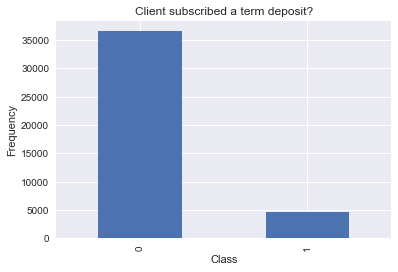

In [38]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
count_classes = pd.value_counts(df['y'], sort= True).sort_index()
count_classes.plot(kind = 'bar')
plt.title('Client subscribed a term deposit?')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [35]:
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [37]:
df[['job', 'y']].groupby(['job'], as_index=False).mean().sort_values(by='y', ascending=False)

,job,y
8,student,0.314286
5,retired,0.252326
10,unemployed,0.142012
0,admin.,0.129726
4,management,0.112175
11,unknown,0.112121
9,technician,0.108260
6,self-employed,0.104856
3,housemaid,0.100000
2,entrepreneur,0.085165


In [55]:
df['job'] = df['job'].apply(lambda x: 0 if x == 'student' else ( 1 if x == 'retire' else 2))

In [39]:
df[['marital', 'y']].groupby(['marital'], as_index=False).mean().sort_values(by='y', ascending=False)

,marital,y
3,unknown,0.150000
2,single,0.140041
0,divorced,0.103209
1,married,0.101573


In [50]:
df = df[df.marital != 'unknown']
df['marital'] = df['marital'].map( {'single': 0, 'divorced': 1, 'married': 2}).astype(int)

In [40]:
df[['education', 'y']].groupby(['education'], as_index=False).mean().sort_values(by='y', ascending=False)

,education,y
4,illiterate,0.222222
7,unknown,0.145003
6,university.degree,0.137245
5,professional.course,0.113485
3,high.school,0.108355
0,basic.4y,0.102490
1,basic.6y,0.082024
2,basic.9y,0.078246


In [54]:
df['education'] = df['education'].apply(lambda x: 0 if x == 'illiterate' else 0)

In [41]:
df[['default', 'y']].groupby(['default'], as_index=False).mean().sort_values(by='y', ascending=False)

,default,y
0,no,0.12879
1,unknown,0.05153
2,yes,0.00000


In [49]:
df = df[df.default != 'unknown']
df['default'] = df['default'].map( {'no': 0, 'yes': 1}).astype(int)

In [42]:
df[['housing', 'y']].groupby(['housing'], as_index=False).mean().sort_values(by='y', ascending=False)

,housing,y
2,yes,0.116194
0,no,0.108796
1,unknown,0.108081


In [48]:
df.drop(['housing'], axis=1, inplace=True)

In [43]:
df[['loan', 'y']].groupby(['loan'], as_index=False).mean().sort_values(by='y', ascending=False)

,loan,y
0,no,0.113402
2,yes,0.109315
1,unknown,0.108081


In [46]:
df.drop(['loan'], axis=1, inplace=True)

In [44]:
df[['contact', 'y']].groupby(['contact'], as_index=False).mean().sort_values(by='y', ascending=False)

,contact,y
0,cellular,0.147376
1,telephone,0.052313


In [47]:
df['contact'] = df['contact'].map( {'telephone': 0, 'cellular': 1}).astype(int)

In [45]:
df[['poutcome', 'y']].groupby(['poutcome'], as_index=False).mean().sort_values(by='y', ascending=False)

,poutcome,y
2,success,0.651129
0,failure,0.142286
1,nonexistent,0.088322


In [68]:
df['poutcome'] = df['poutcome'].map( {'success': 0, 'failure': 1, 'nonexistent': 2}).astype(int)

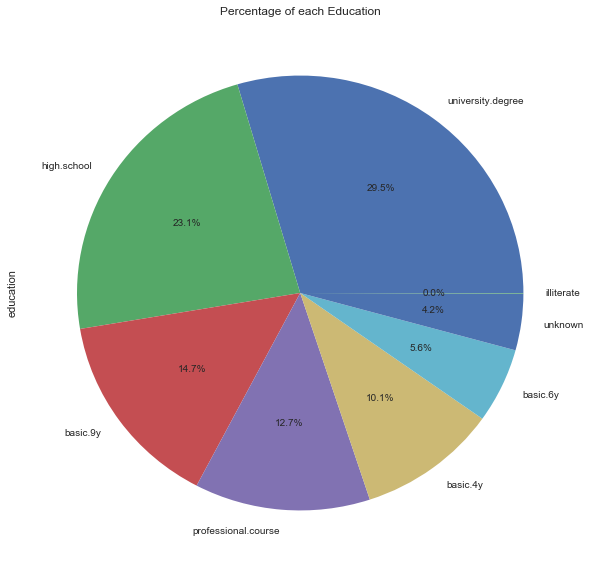

In [18]:
df.education.value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('Percentage of each Education')

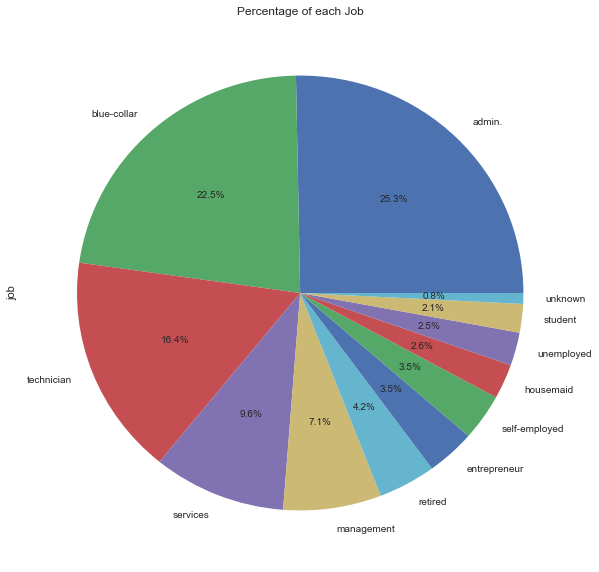

In [19]:
df.job.value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('Percentage of each Job')

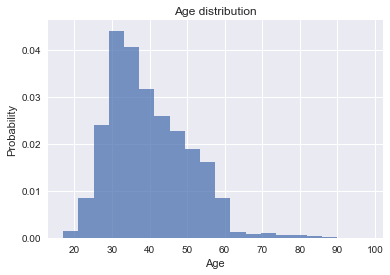

In [24]:
plt.hist(df.age, 20, normed=1,  alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Age distribution')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

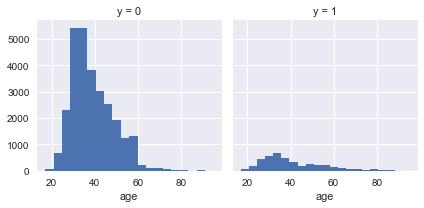

In [51]:
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'age', bins=20)

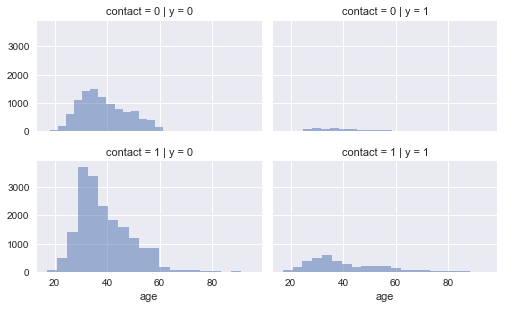

In [53]:
grid = sns.FacetGrid(df, col='y', row='contact', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [58]:
df.drop(['month', 'day_of_week'], axis=1, inplace=True)


In [73]:
X = df.iloc[:, df.columns != 'y']
y = df.iloc[:, df.columns == 'y']

In [56]:
from sklearn.cross_validation import train_test_split

/Users/weifengshe/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))

('Number transactions train dataset: ', 22765)
('Number transactions test dataset: ', 9757)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import 
confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [76]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
y_pred = lr.fit(X_train,y_train.values.ravel()).decision_function(X_test.values)

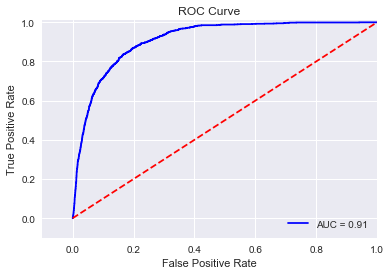

In [80]:
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()